# Table of Contents
 <p><div class="lev1"><a href="#Download-and-visualize-your-own-tweet-text"><span class="toc-item-num">1&nbsp;&nbsp;</span>Download and visualize your own tweet text</a></div><div class="lev2"><a href="#Get-access-to-Twitter-API"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get access to Twitter API</a></div><div class="lev2"><a href="#Steam-tweets"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Steam tweets</a></div><div class="lev2"><a href="#Clean-text"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Clean text</a></div><div class="lev2"><a href="#Create-a-word-cloud"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Create a word cloud</a></div><div class="lev1"><a href="#Text-analysis-on-entrepreneurship-tweets"><span class="toc-item-num">2&nbsp;&nbsp;</span>Text analysis on entrepreneurship tweets</a></div><div class="lev2"><a href="#Read-and-clean-text"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read and clean text</a></div><div class="lev2"><a href="#Look-at-distribution-of-number-of-re-tweets"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Look at distribution of number of re-tweets</a></div><div class="lev2"><a href="#Create-a-word-cloud"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Create a word cloud</a></div><div class="lev2"><a href="#Statistics-on-number-of-re-tweets"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Statistics on number of re-tweets</a></div><div class="lev2"><a href="#Denote-instances-where-number-of-re-tweets-is-more-than-1-and-zero"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Denote instances where number of re-tweets is more than 1 and zero</a></div><div class="lev2"><a href="#Create-word-clouds-for-cases-with-2+-re-tweets-and-with-no-tweets"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Create word clouds for cases with 2+ re-tweets and with no tweets</a></div><div class="lev2"><a href="#Get-terms-frequencies"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Get terms frequencies</a></div><div class="lev2"><a href="#Plot-terms-frequencies"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Plot terms frequencies</a></div><div class="lev2"><a href="#Create-Bigrams"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Create Bigrams</a></div>

In [1]:
%matplotlib inline
%load_ext rpy2.ipython
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import pickle
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer 
nltk.download()

In [3]:
%%R
library(rjson)
library(RCurl) 
library(ROAuth)
library(streamR)
library(RJSONIO)
library(stringi)

In [4]:
tokenizer=WordPunctTokenizer()
lemmatizer=WordNetLemmatizer()
stemmer=PorterStemmer()
stopWords=stopwords.words('english')
customList=['amp','rt','via','quot']
exclude=stopWords+customList

In [5]:
def cleaning(text,mode='lem'):

    '''Function
    --------
    Return a tweet after removing urls, RTs, and characters, which are not letters.
    Also lemmitizes or stems words in tweet

    Parameters
    ----------
    text : str
        Orifinal tweet
    mode : str
        if 'lem' then function  lemmatizes words in a tweet, else stems 

    Returns
    -------
    clean tweet : str'''
    
    text = re.sub(r'\s*RT\s\S*\s', '', text)  # delete any number of RT....
    text = re.sub(r'http\S*', '', text)  # remove url
    words = tokenizer.tokenize(text.lower())
    cleanWords=[word for word in words if word not in exclude]
    lemWords=[]
    stemWords=[]
    for word in cleanWords:    
        letters=''.join([letter for letter in word if letter.isalpha()])# keeps only letters
        if mode=='lem':
            lemWords.append(lemmatizer.lemmatize(letters)) # for better lemmatizing Part Of Speech tags are requered
            continue
        stemWords.append(stemmer.stem(letters))
    if mode=='lem':        
        return  ' '.join(lemWords)
    else: 
        return ' '.join(stemWords)
    
def termFreq(data,max_features):
    
    '''Function
    --------
    Return a data frame with number of words occurances in corpus
    Parameters
    ----------
    data : Series
        series with tweets
        
    max_features : int
        number of most frequent words  

    Returns
    -------
    table with frequencies : data frame'''    
    
    vectorizer=CountVectorizer(max_features=max_features)
    matrix=vectorizer.fit_transform(data).todense()
    matrixSum=np.sum(matrix, axis=0)
    return pd.DataFrame(matrixSum.transpose(),index = vectorizer.get_feature_names())    
    

# Download and visualize your own tweet text

## Get access to Twitter API

In [ ]:
%%R
requestURL <- "https://api.twitter.com/oauth/request_token"
accessURL <- "https://api.twitter.com/oauth/access_token"
authURL <- "https://api.twitter.com/oauth/authorize"
consumerKey <- "XXX"
consumerSecret <- "XXX"

my_oauth <- OAuthFactory$new(consumerKey = consumerKey, consumerSecret = consumerSecret,requestURL = requestURL,
                             accessURL = accessURL, authURL = authURL)

my_oauth$handshake(cainfo = system.file("CurlSSL", "cacert.pem", package = "RCurl"))
save(my_oauth, file = "my_oauth.Rdata")

## Steam tweets

In [7]:
%%R
load("my_oauth.Rdata")
keyWord='apple'
filterStream(file.name = "tweets.json", # Save tweets in a json file
             track = keyWord, #
             language = "en",
             timeout = 60, # Keep connection alive for 60 seconds
             oauth = my_oauth) # Use my_oauth file as the OAuth credentials
 
tweetsDf <- parseTweets("tweets.json", simplify = FALSE)
tweetsDf$text=stri_encode(tweetsDf$text, "", "UTF-8")

/home/andrey/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Connection to Twitter stream was closed after 60 seconds with up to 232 tweets downloaded.

  warnings.warn(x, RRuntimeWarning)


1359 tweets have been parsed. 


## Clean text

In [8]:
%Rpull tweetsDf
%Rpull keyWord
# If python gives Unicode error, you need to encode to UTF-8 other text columns (eg. 'description','screen_name' etc)
tweetsDfShort=tweetsDf['text,created_at,id_str,source,screen_name,retweet_count,lat,lon,followers_count,retweeted'.split(',')]
tweetsDfShort['textCleanLem']=tweetsDfShort.text.apply(cleaning)# cleaning fuction is in 'lem' mode by default
tweetsDfShort['textCleanStem']=tweetsDfShort.text.apply(lambda x: cleaning(x, mode='stem'))
tweetsDfShort[['text','textCleanLem','textCleanStem']].head()

,text,textCleanLem,textCleanStem
1,Leading ten Greatest iOS 8 Jailbreak Cydia Twe...,leading ten greatest io jailbreak cydia tweak...,lead ten greatest io jailbreak cydia tweak ...
2,RT @Samoan_strong: @_Tuitogamatoe nah this ain...,tuitogamatoe nah liquor store got apple cir...,tuitogamato nah liquor store got appl ciroc...
3,RT @TYScientist: Blue Automatic is now on @iTu...,blue automatic itunes go get strangerheads...,blue automat itun go get strangerheadsprevail
4,RT @kremedelakitty: they should just sell it w...,sell already cracked screen save u time,sell alreadi crack screen save us time
5,Leading ten Greatest iOS 8 Jailbreak Cydia Twe...,leading ten greatest io jailbreak cydia tweak...,lead ten greatest io jailbreak cydia tweak ...


## Create a word cloud

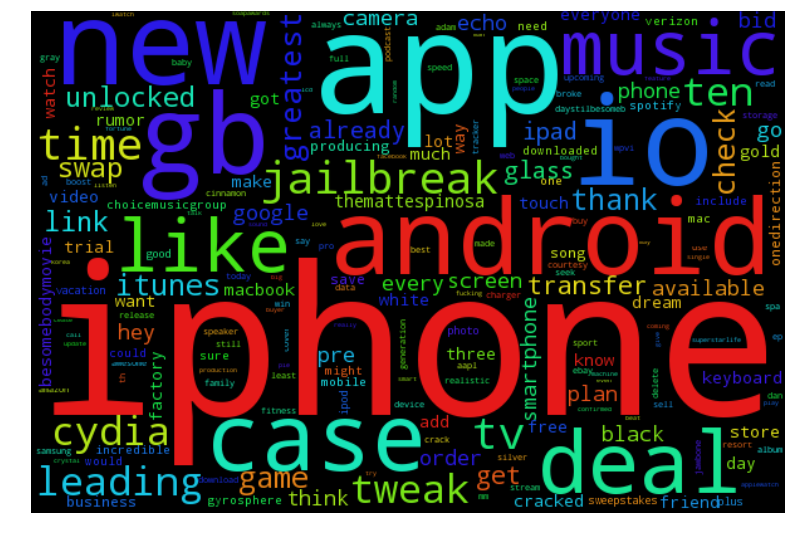

In [9]:
corpus=' '.join(tweetsDfShort.textCleanLem.tolist())
wordcloud = WordCloud(background_color='black',height=400,width=600,
                      stopwords=(keyWord),relative_scaling=0.5).generate(corpus)
plt.figure(figsize=(18,9))
plt.axis("off") 
plt.imshow(wordcloud)

# Text analysis on entrepreneurship tweets

## Read and clean text

In [10]:
df=pd.read_csv('twitter_train.csv', encoding='latin1')
df['textClean']=df.Text.apply(lambda x: cleaning(x, mode='stem'))
df.head(2)

,ID_str,Text,Created,Status_Source,Screen_Name,Latitude,Longitude,Followers_Count,RT_Count_in_TimeWindow,textClean
0,6.293928e+17,@ColorMeRed @krmccall The amount of business r...,Thu Aug 06 20:45:02 +0000 2015,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",KLSouth,NaN,NaN,34271,0,colorm krmccall amount busi regul cronyism ...
1,6.295560e+17,Mobilink Partners with LUMS to Enhance Entrepr...,Fri Aug 07 07:33:45 +0000 2015,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",mohsinrehman,NaN,NaN,160,0,mobilink partner lum enhanc entrepreneuri eco ...


## Look at distribution of number of re-tweets

(0.0, 10)

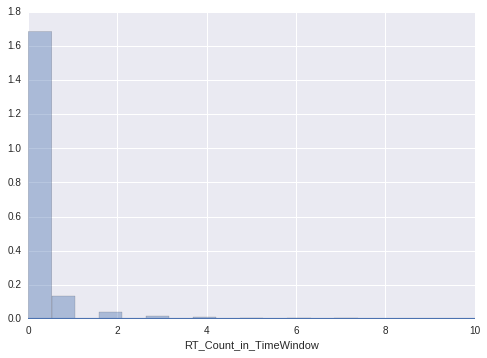

In [11]:
sns.distplot(df.RT_Count_in_TimeWindow,bins=2000)
plt.xlim([0.0, 10]) 

## Create a word cloud

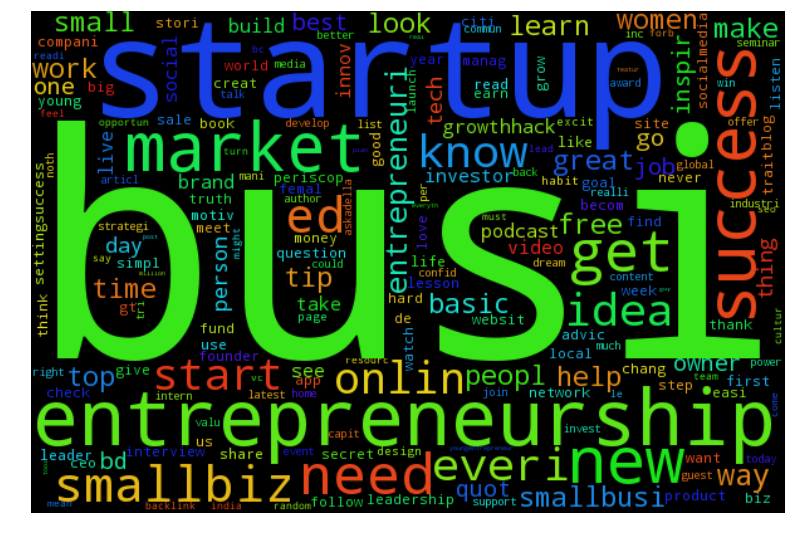

In [12]:
corpus=' '.join(df.textClean.tolist())
wordcloud = WordCloud(background_color='black',height=400,width=600,
                      stopwords=('entrepreneur'),relative_scaling=0.5).generate(corpus)
plt.figure(figsize=(18,9))
plt.axis("off") 
plt.imshow(wordcloud)

## Statistics on number of re-tweets

In [13]:
df.RT_Count_in_TimeWindow.describe()

count    35270.000000
mean         0.582336
std         16.768241
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1054.000000
Name: RT_Count_in_TimeWindow, dtype: float64

## Denote instances where number of re-tweets is more than 1 and zero

In [14]:
df['RetweetCateg']=df.RT_Count_in_TimeWindow.apply(lambda x: 'high' if x>1 else 'low' if x==1 else 'no')
print ('tweets with 2 or more retweets: ', len(df[df['RetweetCateg']=='high']))
print ('tweets with  no retweets: ', len(df[df['RetweetCateg']=='no']))

tweets with 2 or more retweets:  1521
tweets with  no retweets:  31314


## Create word clouds for cases with 2+ re-tweets and with no tweets

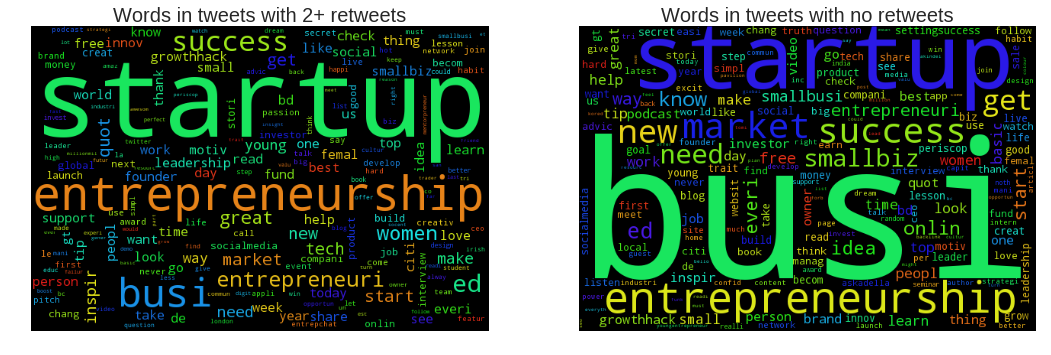

In [15]:
corpusHigh=' '.join(df[df['RetweetCateg']=='high']['textClean'].tolist())
corpusNo=' '.join(df[df['RetweetCateg']=='no']['textClean'].tolist())
wordcloudH = WordCloud(background_color='black',height=400,width=600,
                       stopwords=('entrepreneur'),relative_scaling=0.8).generate(corpusHigh)
wordcloudL = WordCloud(background_color='black',height=400,width=600,
                       stopwords=('entrepreneur'),relative_scaling=0.8).generate(corpusNo)
f, axes = plt.subplots(1, 2, figsize=(18, 10), sharex=False)
axes[0].axis("off"),axes[1].axis("off")  
axes[0].set_title("Words in tweets with 2+ retweets",size=20)
axes[0].imshow(wordcloudH),axes[1].imshow(wordcloudL)
axes[1].set_title("Words in tweets with no retweets",size=20)

## Get terms frequencies

In [16]:
highRetw=termFreq(df[df['RetweetCateg']=='high']['textClean'],30)
highRetw.columns=['High']
noRetw=termFreq(df[df['RetweetCateg']=='no']['textClean'],50)
noRetw.columns=['No']
totalretw=highRetw.merge(noRetw, left_index=True, right_index=True)
totalretw.High=totalretw.High/1521
totalretw.No=totalretw.No/31314
totalretw.sort_values('High',ascending=False).head(10)

,High,No
entrepreneur,0.786325,0.837549
startup,0.202498,0.160312
entrepreneurship,0.142669,0.111931
busi,0.109796,0.211088
success,0.071006,0.086639
ed,0.059829,0.047838
entrepreneuri,0.051282,0.033499
women,0.049967,0.023759
great,0.042078,0.026570
quot,0.038133,0.018873


## Plot terms frequencies

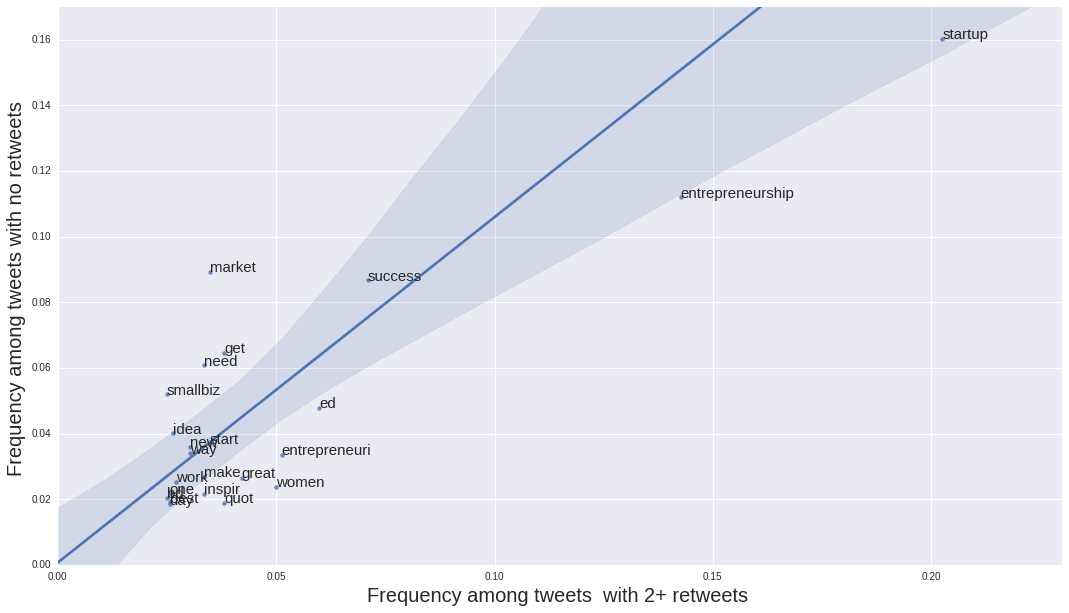

In [17]:
fig, ax = plt.subplots(figsize=(18,10))
sns.regplot(x="High", y="No", data=totalretw,ax=ax)
ax.set_xlim([0.0, 0.23]),ax.set_ylim([0.0, 0.17]) 
ax.set_xlabel('Frequency among tweets  with 2+ retweets ',size=20)
ax.set_ylabel('Frequency among tweets with no retweets ',size=20)
for i, point in totalretw.iterrows():
    if str(point.name) in ['entrepreneur','busi']: continue
    ax.text(point['High'], point['No'], str(point.name),size=15)

## Create Bigrams

In [18]:
vectorizer=CountVectorizer(max_features=25, ngram_range=(2,2))
matrix=vectorizer.fit_transform(df.textClean).todense()
matrixSum=np.sum(matrix, axis=0)
bigrams= pd.DataFrame(matrixSum.transpose(),index = vectorizer.get_feature_names(), columns=['Frequency']) 
bigrams.sort_values('Frequency',ascending=False).head(10)

,Frequency
busi entrepreneur,1540
startup entrepreneur,1436
entrepreneur need,1164
everi entrepreneur,1103
entrepreneur startup,1047
need know,925
onlin market,882
basic everi,868
market basic,851
success entrepreneur,779
